## GRIPNOV 21 Task 2 Submission

### BY SHALEM TENE 

### Topic : Prediction using Unupervised ML

**Problem Statement:**
From the *IRIS* dataset predict the optimal number of clusters and represent them visually.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Loading the Dataset
df= sns.load_dataset('iris')
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [4]:
#Checking the shape of the data
df.shape 
#150 tows and 5 columns

(150, 5)

In [5]:
#Informational Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Observation
    # All features are of numerical data types
    # None of the features contain null values

In [7]:
#Performing Descriptive Summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Finding the unique values in the column 'species'
df['species'].value_counts() 
#3 unique values with a count of 50 each

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

**Inference** 
1. All the species are equally represented in the data with each of them having a count of 50.

### Performing Exploratory Data Analysis 

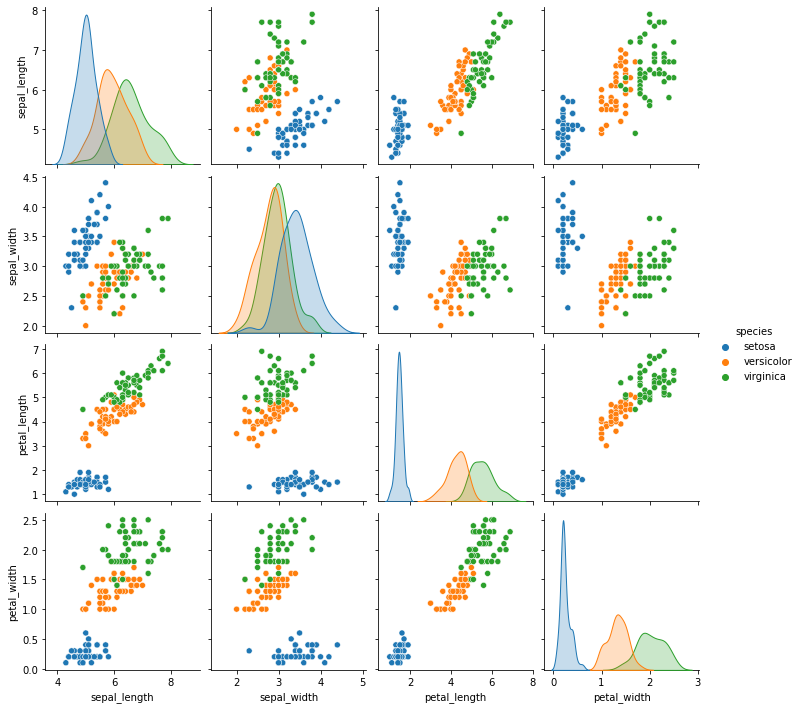

In [10]:
#Visualising using a Pairplot
sns.pairplot(df, diag_kind= 'kde', hue='species');

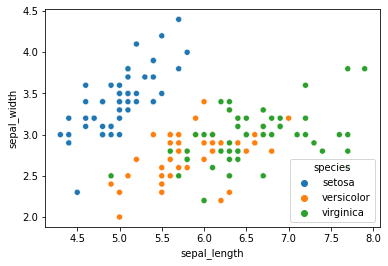

In [11]:
#Scatter plot between sepal length and sepal width
sns.scatterplot(df['sepal_length'], df['sepal_width'],hue=df['species']);

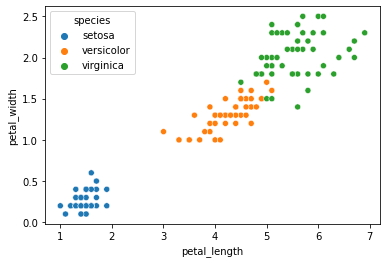

In [12]:
#Scatter plot between petal length and petal width
sns.scatterplot(df['petal_length'], df['petal_width'], hue=df['species']);

**Inferences**

1. From the two scatterplots, we can see that setosa can be easily distinguished from versicolor and virginica because of its smaller petal length and width and significantly larger sepal width and smaller sepal length
2. Versicolor and Virginica are more complicated to identify because of closeness in their petal and sepal dimensions.

### Model Building 

In [13]:
#Here 'species' is a column which is not needed for model building, hence we drop it
df1= df.drop(['species'],axis=1)
df1.head() #Species column dropped

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


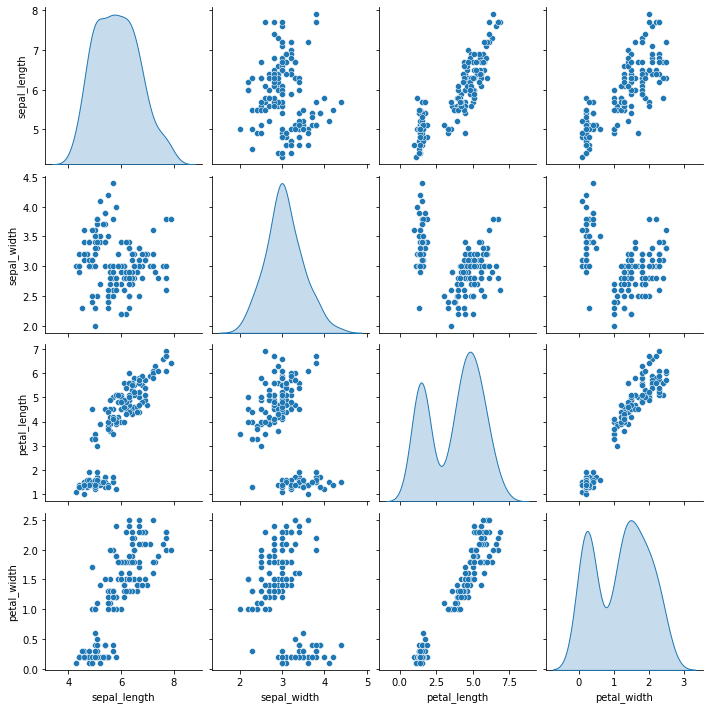

In [16]:
sns.pairplot(df1, diag_kind='kde');

**Inference** 
1. From the pairplot we can see two peaks, in other words we can estimate that there would be atleast two clusters which could be formed.

### Scaling the Data 

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss= StandardScaler()

data= pd.DataFrame(ss.fit_transform(df1), columns=df1.columns)
data.head()
#Data has been transformed

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### K-Means 

In [22]:
#Finding the optimal cluster size for kmeans
#Calculating MSE for various cluster sizes

n_clusters= range(1,10,1)
mse=[]

for i in n_clusters:
    km=KMeans(n_clusters=i)
    km_model= km.fit(data)
    error=km_model.inertia_
    mse.append(error)

df1_inertia= pd.DataFrame({'No of Clusters': n_clusters, 'Inertia': mse})
df1_inertia
#Finding the k means inertia for each cluster, maxmum change in inertia gives ideal number of clusters
#In this case it is 2 Clusters

,No of Clusters,Inertia
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.304803
4,5,91.047361
5,6,80.874548
6,7,71.797778
7,8,63.377051
8,9,54.485993


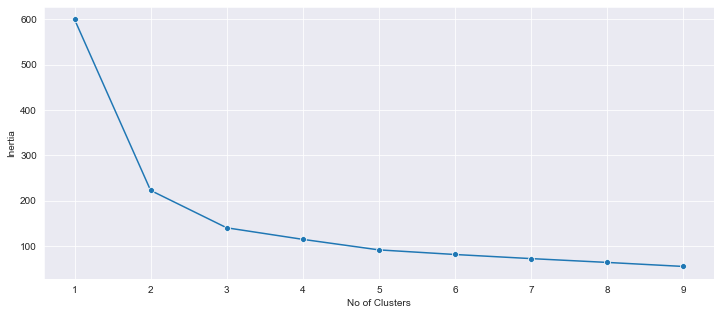

In [26]:
#To confirm we will be plotting the elbow plot
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.lineplot(df1_inertia['No of Clusters'], df1_inertia['Inertia'], marker='o')
plt.show()

In [ ]:
#From the elbow curve we can observe that the largest change in inertia happens at cluster 2
#Hence the ideal number of clusters is confirmed to be 2.

**Inference**
The ideal number of clusters is 2

In [27]:
kms =KMeans(n_clusters=2)
kms_model=kms.fit(data)
y_pred= kms_model.predict(data)

In [28]:
# Creatig a new colum called 'label' which stores the value of cluster label in 'df2' dataframe 
# df2 is copy of dataframe 'data'
df2= data.copy('deep')

df2['label']= y_pred
df2['label'].value_counts()

0    100
1     50
Name: label, dtype: int64

**Inference**
1. Our dataset had 2 distinct species with 50 records each, the distribution shows that one of the clusters was clearly distinguishable from another, assuming it is 'Setosa' because of its significant physical difference. 
2. The second cluster contains Vesicolor and Virginica which cannot be clearly distinguished.

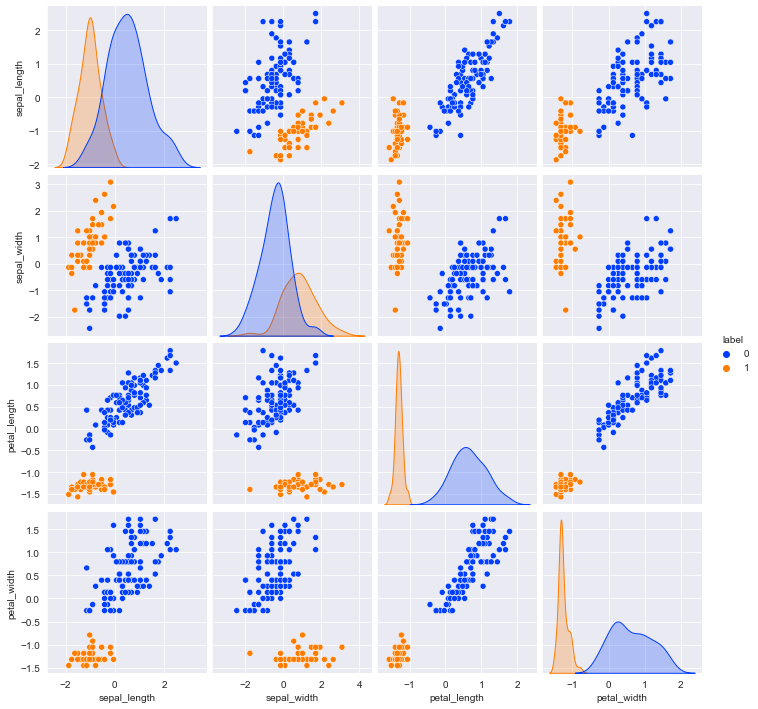

In [30]:
#Running pairplot of df2.
sns.pairplot(df2, diag_kind='kde', hue='label', palette='bright');

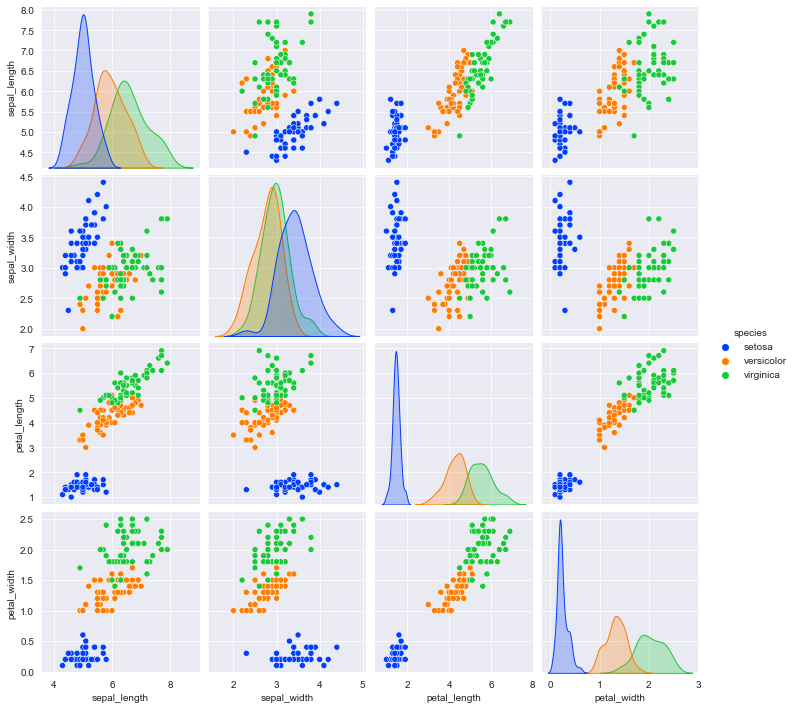

In [32]:
#Comparing it with the dataset df
sns.pairplot(df, diag_kind='kde', hue='species', palette='bright');

**Comparing the two pairplots**
1. We can observe a clear distinction between setosa and the other two species, just like we had concurred. 
2. The other two species are not that clearly distinguishable due to their similar dimensions. 
Label 1 = 'Setosa'
Label 0= 'Vesicolor and Virginica'

In [34]:
#Plotting the clusters on first two features:
    # Inverse tranforming the cluster centers
    # This is done so that we can plot the cluster centers on the orginal data.
    # kms_model.cluster_centers_ stores the scaled cluster value

x = ss.inverse_transform(kms_model.cluster_centers_)

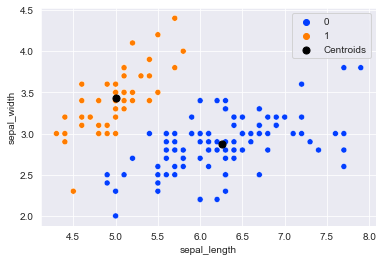

In [35]:
# Scatter plot between sepal_length and sepal_width
sns.scatterplot(df1['sepal_length'],df1['sepal_width'],hue=df2['label'],palette = 'bright');
plt.scatter(x[:, 0], x[:,1], s = 50, c = 'black', label = 'Centroids')

plt.legend()

From the cluster diagram it is clearly visible how distinguishable the two clusters are, however a third cluster for differentiating Vesicolor and Virginica is difficult to find.

## Thank You 